# Weekly Activity

In [1]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Exercise 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


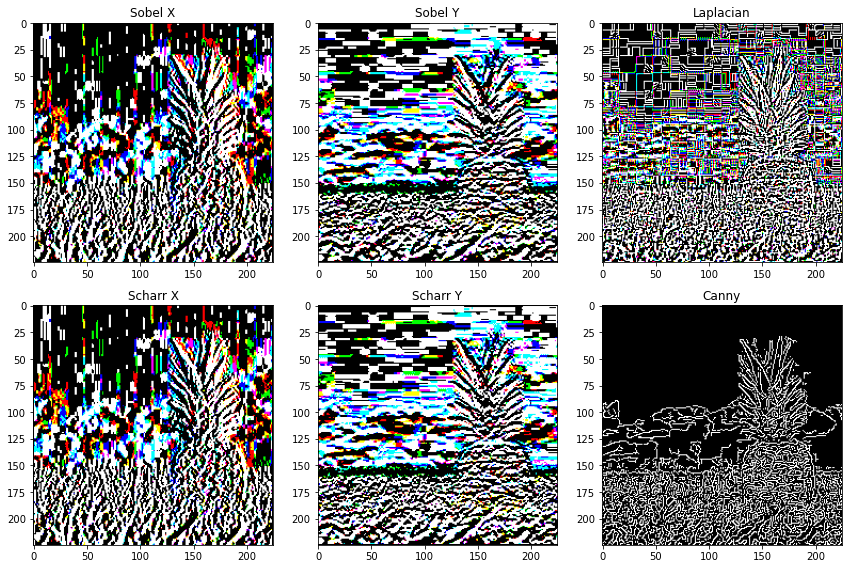

In [2]:
img = cv.imread('images/pineapple.jfif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=3)
scharr_x = cv.Scharr(img, cv.CV_64F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_64F, 0, 1)
canny = cv.Canny(img, threshold1=30, threshold2=70)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')

plt.subplot(2, 3, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.subplot(2, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.subplot(2, 3, 4)
plt.imshow(scharr_x, cmap='gray')
plt.title('Scharr X')

plt.subplot(2, 3, 5)
plt.imshow(scharr_y, cmap='gray')
plt.title('Scharr Y')

plt.subplot(2, 3, 6)
plt.imshow(canny, cmap='gray')
plt.title('Canny')

plt.tight_layout()
plt.show()

## Exercise 2

In [3]:
img = cv.imread('images/electronic.jfif')

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_white = np.array([0, 0, 160])
upper_white = np.array([140, 30, 255])

mask = cv.inRange(hsv, lower_white, upper_white)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv.contourArea)

x, y, w, h = cv.boundingRect(largest_contour)
cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv.imshow('Laptop Detection', img)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 3

In [4]:
img = cv.imread('images/clock.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gray, threshold1=50, threshold2=150)

contours, _ = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_area = 1000  
filtered_contours = [contour for contour in contours if cv.contourArea(contour) > min_area]

largest_contour = max(filtered_contours, key=cv.contourArea)

((x, y), radius) = cv.minEnclosingCircle(largest_contour)
center = (int(x), int(y))
radius = int(radius)

cv.circle(img, center, radius, (0, 255, 0), 2)

cv.imshow('Isolated Clock', img)
cv.waitKey(0)
cv.destroyAllWindows()
